# Preprocessing


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

'''
The following code for importing Google Spreadsheets was obtained from:
Author: Michael Harris
Date: 9/22/2019
URL: https://medium.com/analytics-vidhya/colab-and-google-sheets-surprisingly-powerful-combination-for-data-science-part-1-bbbb11cbd8e
'''

from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials

# Loading the Data

In [4]:
'''
The following code for importing Google Spreadsheets was adapted from:
Author: Michael Harris
Date: 9/22/2019
URL: https://medium.com/analytics-vidhya/colab-and-google-sheets-surprisingly-powerful-combination-for-data-science-part-1-bbbb11cbd8e

Comments are my own.
'''

gc = gspread.authorize(GoogleCredentials.get_application_default())

# Open SOL pass rate per school spreadsheet and store in DataFrame object
sol_pass_rates_wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1qp0u1BgpYqEmPFnl8eqGLnIeOzDSr0TbaPlS1uWC-B4/edit?usp=sharing')
sol_pass_rates_sheet = sol_pass_rates_wb.worksheet('Sheet1')
sol_pass_rates_data = sol_pass_rates_sheet.get_all_values()
sol_pass_rates_school_df = pd.DataFrame(sol_pass_rates_data)

# Clear first 2 rows from dataframe (these are just comments and the column headers) 
sol_pass_rates_school_df.columns = sol_pass_rates_school_df.iloc[2]
sol_pass_rates_school_df = sol_pass_rates_school_df.iloc[3:]

# Open SOL pass rate by state spreadsheet and store in DataFrame object
sol_pass_rates_state_wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1G3Dgfz_KvtjKyTX7-001rqbxFG6Kgjlb-iaEW39EcEQ/edit?usp=sharing')
sol_pass_rates_state_sheet = sol_pass_rates_state_wb.worksheet('Sheet1')
sol_pass_rates_state_data = sol_pass_rates_state_sheet.get_all_values()
sol_pass_rates_state_df = pd.DataFrame(sol_pass_rates_state_data)

# Clear first 2 rows from dataframe (these are just comments and the column headers)
sol_pass_rates_state_df.columns = sol_pass_rates_state_df.iloc[2]
sol_pass_rates_state_df = sol_pass_rates_state_df.iloc[3:]

# Open Mode of Instruction spreadsheet and store in DataFrame object
mode_of_instruction_wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/15sOJYHT1qzkfcvltRYUsf7omSZktTQqOy21jcV8BPdw/edit?usp=sharing')
mode_of_instruction_sheet= mode_of_instruction_wb.worksheet('Sheet1')
mode_of_instruction_data = mode_of_instruction_sheet.get_all_values()
mode_of_instruction_df = pd.DataFrame(mode_of_instruction_data)

# Clear first row from dataframe (this is just the column headers)
mode_of_instruction_df.columns = mode_of_instruction_df.iloc[0]
mode_of_instruction_df = mode_of_instruction_df.iloc[1:]

# Open Fall Membership (White) spreadsheet
fall_membership_white_wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1gbyx7u4nWbKJwJPKKqAltDWGasudAoLF92yivSvP5fI/edit?usp=sharing')
fall_membership_white_sheet = fall_membership_white_wb.worksheet('Sheet1')
fall_membership_white_data = fall_membership_white_sheet.get_all_values()
fall_membership_white_df = pd.DataFrame(fall_membership_white_data)

# Clear first row from dataframe (this is just the column headers)
fall_membership_white_df.columns = fall_membership_white_df.iloc[0]
fall_membership_white_df = fall_membership_white_df.iloc[1:]

# Open Fall Membership (Black) student spreadsheet
fall_membership_black_wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1qohNjHcufgubIeAg8-w63pBGiNzis6WTtiTd_FQYIIc/edit?usp=sharing')
fall_membership_black_sheet = fall_membership_black_wb.worksheet('Sheet1')
fall_membership_black_data = fall_membership_black_sheet.get_all_values()
fall_membership_black_df = pd.DataFrame(fall_membership_black_data)

# Clear first row from dataframe (this is just the column headers)
fall_membership_black_df.columns = fall_membership_black_df.iloc[0]
fall_membership_black_df = fall_membership_black_df.iloc[1:]

# Cleaning the Data

In [5]:
# SOL PASS RATES PER SCHOOL

# Impute cells containing "<" with NaN so they are ignored in calculations
# We do this because '<' indicates there was too small of a sample size to compute a passing rate
sol_pass_rates_school_df = sol_pass_rates_school_df.replace(to_replace='<', value=np.nan)

# Rename column for consistency with other datasets
sol_pass_rates_school_df = sol_pass_rates_school_df.rename(columns={'Div Num':'Division Number', 'Div Name':'Division Name', 'Sch Num':'School Number', 'Sch Name':'School Name'})

# Convert numeric cells to integer/float types
sol_pass_rates_school_df = sol_pass_rates_school_df.apply(pd.to_numeric, errors='ignore')

s = sol_pass_rates_school_df[['School Name', 'Subject', 'Subgroup', '2018-2019 Pass Rate', '2020-2021 Pass Rate']]

In [6]:
# SOL PASS RATES PER OVERALL STATE

# Impute cells containing "<" with NaN so they are ignored in calculations
# We do this because '<' indicates there was too small of a sample size to compute a passing rate
sol_pass_rates_state_df = sol_pass_rates_state_df.replace(to_replace='<', value=np.nan)

# Remove unneeded column (Students didn't take SOLS during 2019-2020)
sol_pass_rates_state_df = sol_pass_rates_state_df.drop(columns=['2019-2020 Pass Rate']) 

# Convert numeric cells to integer/float types
sol_pass_rates_state_df = sol_pass_rates_state_df.apply(pd.to_numeric, errors='ignore')

In [7]:
# MODE OF INSTRUCTION PER SCHOOL

# Impute cells containing '<' or '' with 0 (since these are counts, a small sample size would indicate the value is near zero)
mode_of_instruction_df = mode_of_instruction_df.replace({'<': 0, '': 0})

# Convert numeric cells to integer/float type
mode_of_instruction_df = mode_of_instruction_df.apply(pd.to_numeric, errors='ignore')

# Descriptive Statistics - SOL Pass Rates

In [8]:
# Extract subframe of pass rates for Black students
sol_pass_rate_black_df = sol_pass_rates_state_df[sol_pass_rates_state_df['Subgroup'] == 'Black']

# Save 2018-2019 pass rates for each subject
english_pass_rate_black_2018 = sol_pass_rate_black_df['2018-2019 Pass Rate'][sol_pass_rate_black_df['Subject'] == 'English: Reading'].squeeze()
math_pass_rate_black_2018 = sol_pass_rate_black_df['2018-2019 Pass Rate'][sol_pass_rate_black_df['Subject'] == 'Mathematics'].squeeze()
science_pass_rate_black_2018 = sol_pass_rate_black_df['2018-2019 Pass Rate'][sol_pass_rate_black_df['Subject'] == 'Science'].squeeze()

# Save 2020-2021 pass rates for each subject
english_pass_rate_black_2020 = sol_pass_rate_black_df['2020-2021 Pass Rate'][sol_pass_rate_black_df['Subject'] == 'English: Reading'].squeeze()
math_pass_rate_black_2020 = sol_pass_rate_black_df['2020-2021 Pass Rate'][sol_pass_rate_black_df['Subject'] == 'Mathematics'].squeeze()
science_pass_rate_black_2020 = sol_pass_rate_black_df['2020-2021 Pass Rate'][sol_pass_rate_black_df['Subject'] == 'Science'].squeeze()

In [9]:
# Extract subframe of pass rates for White students
sol_pass_rate_white_df = sol_pass_rates_state_df[sol_pass_rates_state_df['Subgroup'] == 'White']

# Save 2018-2019 pass rates for each subject
english_pass_rate_white_2018 = sol_pass_rate_white_df['2018-2019 Pass Rate'][sol_pass_rate_white_df['Subject'] == 'English: Reading'].squeeze()
math_pass_rate_white_2018 = sol_pass_rate_white_df['2018-2019 Pass Rate'][sol_pass_rate_white_df['Subject'] == 'Mathematics'].squeeze()
science_pass_rate_white_2018 = sol_pass_rate_white_df['2018-2019 Pass Rate'][sol_pass_rate_white_df['Subject'] == 'Science'].squeeze()

# Save 2018-2019 pass rates for each subject
english_pass_rate_white_2020 = sol_pass_rate_white_df['2020-2021 Pass Rate'][sol_pass_rate_white_df['Subject'] == 'English: Reading'].squeeze()
math_pass_rate_white_2020 = sol_pass_rate_white_df['2020-2021 Pass Rate'][sol_pass_rate_white_df['Subject'] == 'Mathematics'].squeeze()
science_pass_rate_white_2020 = sol_pass_rate_white_df['2020-2021 Pass Rate'][sol_pass_rate_white_df['Subject'] == 'Science'].squeeze()

In [10]:
# Extract subframe of pass rates for Asian students
sol_pass_rate_asian_df = sol_pass_rates_state_df[sol_pass_rates_state_df['Subgroup'] == 'Asian']

# Save 2018-2019 pass rates for each subject
english_pass_rate_asian_2018 = sol_pass_rate_asian_df['2018-2019 Pass Rate'][sol_pass_rate_asian_df['Subject'] == 'English: Reading'].squeeze()
math_pass_rate_asian_2018 = sol_pass_rate_asian_df['2018-2019 Pass Rate'][sol_pass_rate_asian_df['Subject'] == 'Mathematics'].squeeze()
science_pass_rate_asian_2018 = sol_pass_rate_asian_df['2018-2019 Pass Rate'][sol_pass_rate_asian_df['Subject'] == 'Science'].squeeze()

# Save 2018-2019 pass rates for each subject
english_pass_rate_asian_2020 = sol_pass_rate_asian_df['2020-2021 Pass Rate'][sol_pass_rate_asian_df['Subject'] == 'English: Reading'].squeeze()
math_pass_rate_asian_2020 = sol_pass_rate_asian_df['2020-2021 Pass Rate'][sol_pass_rate_asian_df['Subject'] == 'Mathematics'].squeeze()
science_pass_rate_asian_2020 = sol_pass_rate_asian_df['2020-2021 Pass Rate'][sol_pass_rate_asian_df['Subject'] == 'Science'].squeeze()

In [11]:
# Extract subframe of pass rates for Hispanic students
sol_pass_rate_hispanic_df = sol_pass_rates_state_df[sol_pass_rates_state_df['Subgroup'] == 'Hispanic']

# Save 2018-2019 pass rates for each subject
english_pass_rate_hispanic_2018 = sol_pass_rate_hispanic_df['2018-2019 Pass Rate'][sol_pass_rate_hispanic_df['Subject'] == 'English: Reading'].squeeze()
math_pass_rate_hispanic_2018 = sol_pass_rate_hispanic_df['2018-2019 Pass Rate'][sol_pass_rate_hispanic_df['Subject'] == 'Mathematics'].squeeze()
science_pass_rate_hispanic_2018 = sol_pass_rate_hispanic_df['2018-2019 Pass Rate'][sol_pass_rate_hispanic_df['Subject'] == 'Science'].squeeze()

# Save 2018-2019 pass rates for each subject
english_pass_rate_hispanic_2020 = sol_pass_rate_hispanic_df['2020-2021 Pass Rate'][sol_pass_rate_hispanic_df['Subject'] == 'English: Reading'].squeeze()
math_pass_rate_hispanic_2020 = sol_pass_rate_hispanic_df['2020-2021 Pass Rate'][sol_pass_rate_hispanic_df['Subject'] == 'Mathematics'].squeeze()
science_pass_rate_hispanic_2020 = sol_pass_rate_hispanic_df['2020-2021 Pass Rate'][sol_pass_rate_hispanic_df['Subject'] == 'Science'].squeeze()

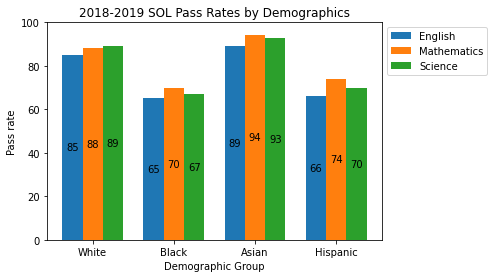

In [12]:
'''
The following code for creating a grouped bar chart was adapted from:
Author: deepanshu_rustagi
URL: https://www.geeksforgeeks.org/create-a-grouped-bar-plot-in-matplotlib/
Date: 12/17/2020

and

Author: matplotlib
URL: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
'''

x = np.arange(4)
y1 = [english_pass_rate_white_2018, english_pass_rate_black_2018, english_pass_rate_asian_2018, english_pass_rate_hispanic_2018]
y2 = [math_pass_rate_white_2018, math_pass_rate_black_2018, math_pass_rate_asian_2018, math_pass_rate_hispanic_2018]
y3 = [science_pass_rate_white_2018, science_pass_rate_black_2018, science_pass_rate_asian_2018, science_pass_rate_hispanic_2018]
width = 0.25
fig, ax = plt.subplots()

rects1 = ax.bar(x-width, y1, width)
rects2 = ax.bar(x, y2, width)
rects3 = ax.bar(x+width, y3, width)

ax.set_xticks(x)
ax.set_xticklabels(['White', 'Black', 'Asian', 'Hispanic'])
ax.set_xlabel("Demographic Group")
ax.set_ylim([0, 100])
ax.set_ylabel("Pass rate")
ax.set_title("2018-2019 SOL Pass Rates by Demographics")
ax.legend(["English", "Mathematics", "Science"], loc='upper left', bbox_to_anchor=(1,1))

'''
The following code (including comments) for adding text labels inside the stacked bars was adapted from
Author: Jonathan Soma
Date: 10/5/2020
URL: https://gist.github.com/jsoma/c61e56819e4ae315ad5d194a630ccb23
'''
for rect in ax.patches:
    # Find where everything is located
    height = round(rect.get_height(), 2)
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The width of the bar is also not pixels, it's the
    # number of animals. So we can use it as the label!
    label_text = height
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center', va='center')

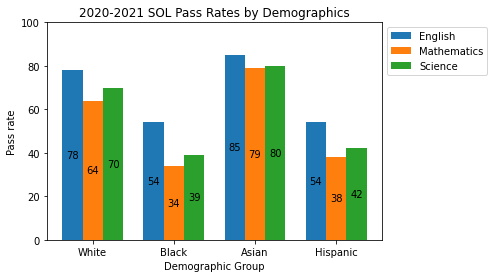

In [13]:
'''
The following code for creating a grouped bar chart was adapted from:
Author: deepanshu_rustagi
URL: https://www.geeksforgeeks.org/create-a-grouped-bar-plot-in-matplotlib/
Date: 12/17/2020

and

Author: matplotlib
URL: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
'''

x = np.arange(4)
y1 = [english_pass_rate_white_2020, english_pass_rate_black_2020, english_pass_rate_asian_2020, english_pass_rate_hispanic_2020]
y2 = [math_pass_rate_white_2020, math_pass_rate_black_2020, math_pass_rate_asian_2020, math_pass_rate_hispanic_2020]
y3 = [science_pass_rate_white_2020, science_pass_rate_black_2020, science_pass_rate_asian_2020, science_pass_rate_hispanic_2020]
width = 0.25

fig, ax = plt.subplots()

rects1 = ax.bar(x-width, y1, width)
rects2 = ax.bar(x, y2, width)
rects3 = ax.bar(x+width, y3, width)

ax.set_xticks(x)
ax.set_xticklabels(['White', 'Black', 'Asian', 'Hispanic'])
ax.set_xlabel("Demographic Group")
ax.set_ylim([0, 100])
ax.set_ylabel("Pass rate")
ax.set_title("2020-2021 SOL Pass Rates by Demographics")
ax.legend(["English", "Mathematics", "Science"], loc='upper left', bbox_to_anchor=(1,1))


'''
The following code (including comments) for adding text labels inside the stacked bars was adapted from
Author: Jonathan Soma
Date: 10/5/2020
URL: https://gist.github.com/jsoma/c61e56819e4ae315ad5d194a630ccb23
'''
for rect in ax.patches:
    # Find where everything is located
    height = round(rect.get_height(), 2)
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The width of the bar is also not pixels, it's the
    # number of animals. So we can use it as the label!
    label_text = height
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center', va='center')

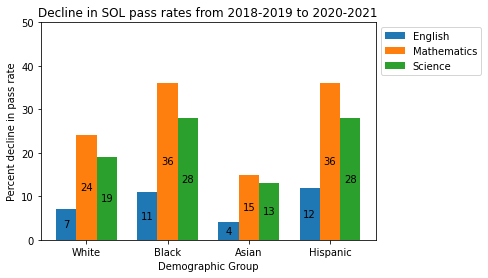

In [14]:
'''
The following code for creating a grouped bar chart was adapted from:
Author: deepanshu_rustagi
URL: https://www.geeksforgeeks.org/create-a-grouped-bar-plot-in-matplotlib/
Date: 12/17/2020

and

Author: matplotlib
URL: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
'''

x = np.arange(4)
y1 = [english_pass_rate_white_2020-english_pass_rate_white_2018, english_pass_rate_black_2020-english_pass_rate_black_2018, english_pass_rate_asian_2020-english_pass_rate_asian_2018, english_pass_rate_hispanic_2020-english_pass_rate_hispanic_2018]
y1 = [abs(y) for y in y1]
y2 = [math_pass_rate_white_2020-math_pass_rate_white_2018, math_pass_rate_black_2020-math_pass_rate_black_2018, math_pass_rate_asian_2020-math_pass_rate_asian_2018, math_pass_rate_hispanic_2020-math_pass_rate_hispanic_2018]
y2 = [abs(y) for y in y2]
y3 = [science_pass_rate_white_2020-science_pass_rate_white_2018, science_pass_rate_black_2020-science_pass_rate_black_2018, science_pass_rate_asian_2020-science_pass_rate_asian_2018, science_pass_rate_hispanic_2020-science_pass_rate_hispanic_2018]
y3 = [abs(y) for y in y3]
width = 0.25

fig, ax = plt.subplots()

rects1 = ax.bar(x-width, y1, width)
rects2 = ax.bar(x, y2, width)
rects3 = ax.bar(x+width, y3, width)

ax.set_xticks(x)
ax.set_xticklabels(['White', 'Black', 'Asian', 'Hispanic'])
ax.set_xlabel("Demographic Group")
ax.set_ylim([0, 50])
ax.set_ylabel("Percent decline in pass rate")
ax.set_title("Decline in SOL pass rates from 2018-2019 to 2020-2021")
ax.legend(["English", "Mathematics", "Science"], loc='upper left', bbox_to_anchor=(1,1))


'''
The following code (including comments) for adding text labels inside the stacked bars was adapted from
Author: Jonathan Soma
Date: 10/5/2020
URL: https://gist.github.com/jsoma/c61e56819e4ae315ad5d194a630ccb23
'''
for rect in ax.patches:
    # Find where everything is located
    height = round(rect.get_height(), 2)
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The width of the bar is also not pixels, it's the
    # number of animals. So we can use it as the label!
    label_text = height
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center', va='center')

# Descriptive Statistics - Mode of Instruction

In [15]:
# Calculate number of Black students learning with each mode of instruction
number_of_black_students = mode_of_instruction_df['Black or African American'].sum()
number_of_black_inperson = mode_of_instruction_df['Black or African American'][mode_of_instruction_df['Mode of Instruction'] == 'Inperson, Full-Time'].sum()
number_of_black_remote = mode_of_instruction_df['Black or African American'][mode_of_instruction_df['Mode of Instruction'] == 'Remote, Full-Time'].sum()
number_of_black_hybrid = mode_of_instruction_df['Black or African American'][mode_of_instruction_df['Mode of Instruction'] == 'Both Inperson and Remote'].sum()

# Calculate percentage of Black students learning with each mode of instruction
percent_black_inperson = round(number_of_black_inperson/number_of_black_students * 100, 2)
percent_black_remote = round(number_of_black_remote/number_of_black_students * 100, 2)
percent_black_hybrid = round(number_of_black_hybrid/number_of_black_students * 100, 2)

print('''
    Total Number of Black Students: {0}
    Number of Black students learning in person: {1}
    Number of Black students learning remotely: {2}
    Number of Black students learning hybrid: {3}
    '''
    .format(number_of_black_students, number_of_black_inperson, number_of_black_remote, number_of_black_hybrid)
    )

print('''
    Percentage of Black students learning in person: {0}
    Percentage of Black students learning remotely: {1}
    Percentage of Black students learning hybrid: {2}
    '''
    .format(percent_black_inperson, percent_black_remote, percent_black_hybrid)
    )


    Total Number of Black Students: 266683
    Number of Black students learning in person: 8473
    Number of Black students learning remotely: 174343
    Number of Black students learning hybrid: 83867
    

    Percentage of Black students learning in person: 3.18
    Percentage of Black students learning remotely: 65.37
    Percentage of Black students learning hybrid: 31.45
    


In [16]:
# Calculate number of White students learning with each mode of instruction
number_of_white_students = mode_of_instruction_df['White'].sum()
number_of_white_inperson = mode_of_instruction_df['White'][mode_of_instruction_df['Mode of Instruction'] == 'Inperson, Full-Time'].sum()
number_of_white_remote = mode_of_instruction_df['White'][mode_of_instruction_df['Mode of Instruction'] == 'Remote, Full-Time'].sum()
number_of_white_hybrid = mode_of_instruction_df['White'][mode_of_instruction_df['Mode of Instruction'] == 'Both Inperson and Remote'].sum()

# Calculate percentage of White students learning with each mode of instruction
percent_white_inperson = round(number_of_white_inperson/number_of_white_students * 100, 2)
percent_white_remote = round(number_of_white_remote/number_of_white_students * 100, 2)
percent_white_hybrid = round(number_of_white_hybrid/number_of_white_students * 100, 2)

print('''
    Total Number of White Students: {0}
    Number of white students learning in person: {1}
    Number of white students learning remotely: {2}
    Number of white students learning hybrid: {3}
    '''
    .format(number_of_white_students, number_of_white_inperson, number_of_white_remote, number_of_white_hybrid)
    )

print('''
    Percentage of White students learning in person: {0}
    Percentage of White students learning remotely {1}
    Percentage of White students learning hybrid: {2}
    '''
    .format(percent_white_inperson, percent_white_remote, percent_white_hybrid)
    )


    Total Number of White Students: 562855
    Number of white students learning in person: 36038
    Number of white students learning remotely: 204176
    Number of white students learning hybrid: 322641
    

    Percentage of White students learning in person: 6.4
    Percentage of White students learning remotely 36.28
    Percentage of White students learning hybrid: 57.32
    


In [17]:
# Calculate number of Asian students learning with each mode of instruction
number_of_asian_students = mode_of_instruction_df['Asian'].sum()
number_of_asian_inperson = mode_of_instruction_df['Asian'][mode_of_instruction_df['Mode of Instruction'] == 'Inperson, Full-Time'].sum()
number_of_asian_remote = mode_of_instruction_df['Asian'][mode_of_instruction_df['Mode of Instruction'] == 'Remote, Full-Time'].sum()
number_of_asian_hybrid = mode_of_instruction_df['Asian'][mode_of_instruction_df['Mode of Instruction'] == 'Both Inperson and Remote'].sum()

# Calculate percentage of White students learning with each mode of instruction
percent_asian_inperson = round(number_of_asian_inperson/number_of_asian_students * 100, 2)
percent_asian_remote = round(number_of_asian_remote/number_of_asian_students * 100, 2)
percent_asian_hybrid = round(number_of_asian_hybrid/number_of_asian_students * 100, 2)

print('''
    Total Number of Asian Students: {0}
    Number of Asian students learning in person: {1}
    Number of Asian students learning remotely: {2}
    Number of Asian students learning hybrid: {3}
    '''
    .format(number_of_asian_students, number_of_asian_inperson, number_of_asian_remote, number_of_asian_hybrid)
    )

print('''
    Percentage of Asian students learning in person: {0}
    Percentage of Asian students learning remotely {1}
    Percentage of Asian students learning hybrid: {2}
    '''
    .format(percent_asian_inperson, percent_asian_remote, percent_asian_hybrid)
    )


    Total Number of Asian Students: 91965
    Number of Asian students learning in person: 1180
    Number of Asian students learning remotely: 66864
    Number of Asian students learning hybrid: 23921
    

    Percentage of Asian students learning in person: 1.28
    Percentage of Asian students learning remotely 72.71
    Percentage of Asian students learning hybrid: 26.01
    


In [18]:
# Calculate number of Hispanic students learning with each mode of instruction
number_of_hispanic_students = mode_of_instruction_df['Hispanic'].sum()
number_of_hispanic_inperson = mode_of_instruction_df['Hispanic'][mode_of_instruction_df['Mode of Instruction'] == 'Inperson, Full-Time'].sum()
number_of_hispanic_remote = mode_of_instruction_df['Hispanic'][mode_of_instruction_df['Mode of Instruction'] == 'Remote, Full-Time'].sum()
number_of_hispanic_hybrid = mode_of_instruction_df['Hispanic'][mode_of_instruction_df['Mode of Instruction'] == 'Both Inperson and Remote'].sum()

# Calculate percentage of Hispanic students learning with each mode of instruction
percent_hispanic_inperson = round(number_of_hispanic_inperson/number_of_hispanic_students * 100, 2)
percent_hispanic_remote = round(number_of_hispanic_remote/number_of_hispanic_students * 100, 2)
percent_hispanic_hybrid = round(number_of_hispanic_hybrid/number_of_hispanic_students * 100, 2)

print('''
    Total Number of Hispanic Students: {0}
    Number of Hispanic students learning in person: {1}
    Number of Hispanic students learning remotely: {2}
    Number of Hispanic students learning hybrid: {3}
    '''
    .format(number_of_hispanic_students, number_of_hispanic_inperson, number_of_hispanic_remote, number_of_hispanic_hybrid)
    )

print('''
    Percentage of Hispanic students learning in person: {0}
    Percentage of Hispanic students learning remotely {1}
    Percentage of Hispanic students learning hybrid: {2}
    '''
    .format(percent_hispanic_inperson, percent_hispanic_remote, percent_hispanic_hybrid)
    )


    Total Number of Hispanic Students: 212441
    Number of Hispanic students learning in person: 7810
    Number of Hispanic students learning remotely: 104681
    Number of Hispanic students learning hybrid: 99950
    

    Percentage of Hispanic students learning in person: 3.68
    Percentage of Hispanic students learning remotely 49.28
    Percentage of Hispanic students learning hybrid: 47.05
    


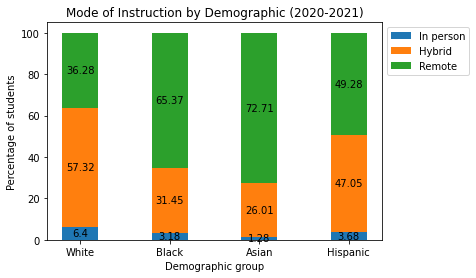

In [19]:
'''
The following code for creating a stacked bar chart was adapted from
Author: Yan Holtz
URL: https://www.python-graph-gallery.com/13-percent-stacked-barplot
'''

labels = ['White', 'Black', 'Asian', 'Hispanic']
percent_inperson = [percent_white_inperson, percent_black_inperson, percent_asian_inperson, percent_hispanic_inperson]
percent_hybrid = [percent_white_hybrid, percent_black_hybrid, percent_asian_hybrid, percent_hispanic_hybrid]
percent_remote = [percent_white_remote, percent_black_remote, percent_asian_remote, percent_hispanic_remote]
bar_width = 0.4

fig, ax = plt.subplots()
ax.bar(labels, percent_inperson, label='In person', width=bar_width)
ax.bar(labels, percent_hybrid, bottom=percent_inperson, label='Hybrid', width=bar_width)
ax.bar(labels, percent_remote, bottom=[i + j for i,j in zip(percent_inperson, percent_hybrid)], label='Remote', width=bar_width)

'''
The following code (including comments) for adding text labels inside the stacked bars was adapted from
Author: Jonathan Soma
Date: 10/5/2020
URL: https://gist.github.com/jsoma/c61e56819e4ae315ad5d194a630ccb23
'''
for rect in ax.patches:
    # Find where everything is located
    height = round(rect.get_height(), 2)
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The width of the bar is also not pixels, it's the
    # number of animals. So we can use it as the label!
    label_text = height
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center', va='center')

ax.set_ylabel("Percentage of students")
ax.set_xlabel("Demographic group")
ax.set_title("Mode of Instruction by Demographic (2020-2021)")

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.show()